In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

DATA_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw"))
DATA_OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), "../data/output"))

# To get the example images that below worked on please first run the download_assets.py file

Image shape (H, W, C):  (720, 1280, 3)
Image data type:  uint8


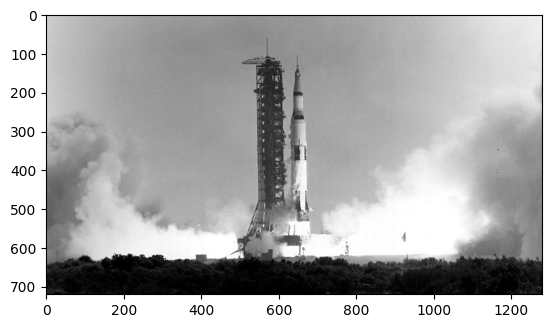

In [33]:
img_apollo_path = f"{DATA_RAW_PATH}/Apollo_11_Launch.jpg"
image = cv2.imread(img_apollo_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Image shape (H, W, C): ", image_rgb.shape)
print("Image data type: ", image_rgb.dtype)

plt.imshow(image_rgb)

#### Drawing a Line


Let's start off by drawing a line on an image. We will use cv2.line function for this.

##### <font style="color:rgb(8,133,37)">Function Syntx</font>
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line

2. `pt1`:   First point(x,y location) of the line segment

3. `pt2`:   Second point of the line segment

4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.

2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.
    
##### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`line`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2" target="_blank">Documentation link</a>

Let's see an example of this.

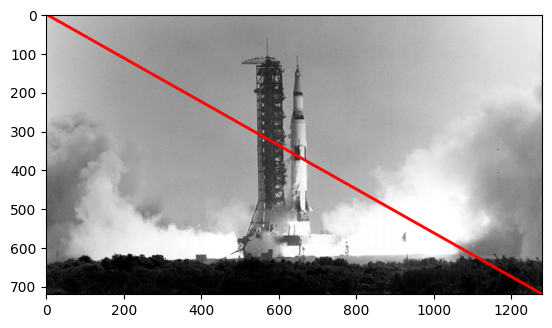

In [34]:
image_line = image_rgb.copy()

cv2.line(image_line, (0, 0), (image.shape[1] - 1, image.shape[0] - 1),
         (255, 0, 0), thickness=5, lineType=cv2.LINE_AA)

plt.imshow(image_line)

#### Drawing a Circle


Let's start off by drawing a circle on an image. We will use cv2.circle function for this.

##### <font style="color:rgb(8,133,37)">Functional syntx</font>
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line

2. `center`: Center of the circle

3. `radius`: Radius of the circle

4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive).
If a negative value is supplied for this argument, it will result in a filled circle.

2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **cv2.line**
    
##### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>
    
**`circle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670" target="_blank">Documentation link</a>

Let's see an example of this.

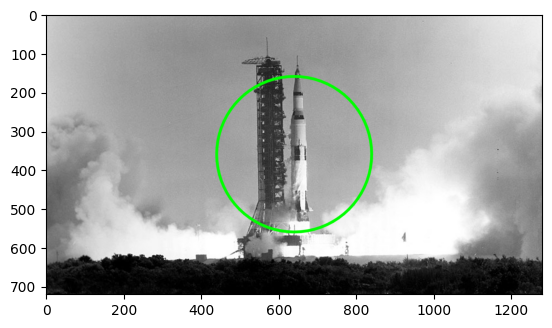

In [35]:
image_circle = image_rgb.copy()
cv2.circle(image_circle, (round(image_circle.shape[1] / 2), round(
    image_circle.shape[0] / 2)), radius=200, color=(0, 255, 0),  thickness=5, lineType=cv2.LINE_AA)

plt.imshow(image_circle)

#### Drawing a Rectangle


We will use **cv2.rectangle** function to draw a rectangle on an image. The function syntax is as follows.

##### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.

2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.

3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right** vertex here.

4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the rectangle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

2. `lineType`: Type of the rectangle boundary. This is exact same as lineType argument in
    **cv2.line**
    
##### <font style="color:rgb(8,133,37)">OpenCV Documentation Links</font>

**`rectangle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9" target="_blank">Documentation link</a>
   
Let's see an example of this.

(426, 90)
(852, 450)


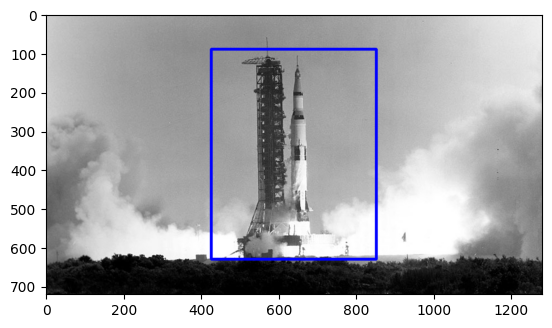

In [36]:
image_rectangle = image_rgb.copy()
row_divider = 3
row_each_pixel = int(image_rgb.shape[1] / 3)


col_divider = 8
col_each_pixel = int(image_rgb.shape[0] / col_divider)

print(((1 * row_each_pixel), (1 * col_each_pixel)))
print(((2 * row_each_pixel), (5 * col_each_pixel)))

cv2.rectangle(image_rectangle, ((1 * row_each_pixel), (1 * col_each_pixel)), ((2 *
              row_each_pixel), (7 * col_each_pixel)), color=(0, 0, 255), thickness=5, lineType=cv2.LINE_AA)
plt.imshow(image_rectangle)

#### Adding Text


Finally, let's see how we can write some text on an image using **cv2.putText** function.

##### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.

2. `text`: Text string to be written.

3. `org`: Bottom-left corner of the text string in the image.

4. `fontFace`: Font type

5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.

6. `color`: Font color

Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.

2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

##### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`putText`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576" target="_blank">Documentation link</a>
    
Let's see an example of this.

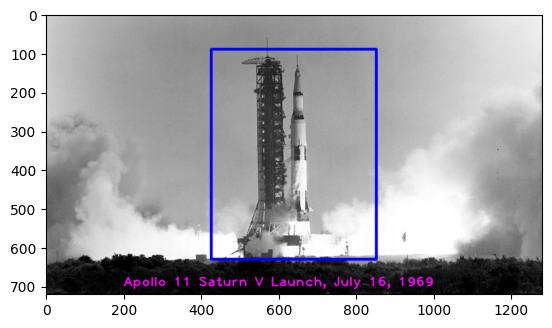

In [38]:
imageText = "Apollo 11 Saturn V Launch, July 16, 1969"
font_scale = 2.3
font_face = cv2.FONT_HERSHEY_PLAIN
font_color = (255, 0, 255)
font_thickness = 2


cv2.putText(image_rectangle, imageText, (200, 700), font_face, font_scale, font_color, font_thickness, cv2.LINE_AA);
plt.imshow(image_rectangle)